##Calculating and Comparing Rates of Return

The art of finance is not about maximizing an investor's return in a year, but more so, about making informed decisions that consider both dimensions, risk, and return - optimizing the risk-return combination of an investment portfolio.

Types of Rates of Return:
1. **Simple Returns** - preferable when having to deal with multiple assets over the same timeframe.
  * (Ending Price - Beginning Price) / Beginning Price
2. **Log Returns** - preferable when making calculations about a single asset over time.
  * Log(Ending Price / Beginning Price)


In [ ]:
# Update pandas datareader
!pip install --upgrade pandas-datareader

In [ ]:
# Import relevant libraries
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [ ]:
# Read in data from website (Yahoo Finance) 
PG = web.DataReader("PG", data_source = "yahoo", start="1995-1-1")

In [ ]:
# Review the first 5 rows of the PG dataframe
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.971117
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.907224
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.795406
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.811379
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.779427


In [ ]:
# Review the last 5 rows of the PG dataframe
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-14,157.059998,153.360001,156.139999,156.740005,9472200.0,156.740005
2022-02-15,159.320007,156.110001,157.770004,156.820007,6659200.0,156.820007
2022-02-16,158.779999,156.270004,156.830002,158.009995,9315700.0,158.009995
2022-02-17,160.380005,157.350006,158.380005,159.820007,7925500.0,159.820007
2022-02-18,161.059998,158.820007,159.500000,159.899994,8061600.0,159.899994


Can check that the data is correct by comparing directly from the Yahoo Finance's Historical Data for P&G (https://finance.yahoo.com/quote/PG/history?p=PG)

### Simple Rate of Return
> (P1 - P0)/ P0  =  P1/P0 - 1

`.shift()` used to shift index axis by a specified period in a time-series data

In [ ]:
# Create a column that calculates the Simple Rate of Return for each day
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1  
PG['simple_return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2022-02-14    0.002879
2022-02-15    0.000510
2022-02-16    0.007588
2022-02-17    0.011455
2022-02-18    0.000500
Name: simple_return, Length: 6833, dtype: float64

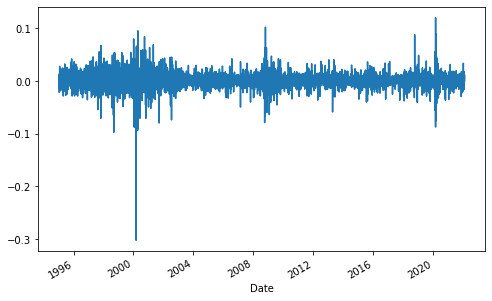

In [ ]:
# Plot to visualize the data better
PG['simple_return'].plot(figsize=(8,5));

In [ ]:
# Review average daily rate of return
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005389240390829345

In [ ]:
# Review average annual rate of return (250 trading days in a year)
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.1347310097707336

In [ ]:
# Convert output into a string
print(str(round(avg_returns_a,3) * 100) + ' %')

13.5 %


###Log Returns

> ln(Pt / Pt-1)




In [ ]:
# Review the top 5 rows of PG dataframe again
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.971117,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.907224,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.795406,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.811379,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.779427,-0.004090


In [ ]:
# Add column to PG dataframe that calculated the log returns
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['log_return']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2022-02-14    0.002875
2022-02-15    0.000510
2022-02-16    0.007560
2022-02-17    0.011390
2022-02-18    0.000500
Name: log_return, Length: 6833, dtype: float64

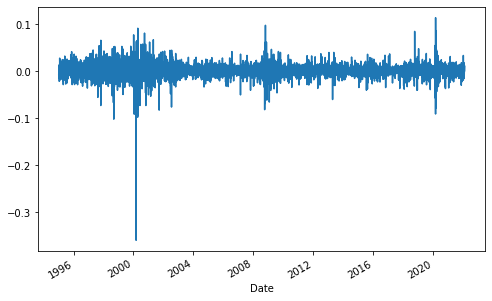

In [ ]:
# Visualize the column of Log Returns
PG['log_return'].plot(figsize=(8,5));

In [ ]:
# Calculate the mean of the daily log returns
log_return_d = PG['log_return'].mean()
log_return_d

0.0004389232941535327

In [ ]:
# Determine the mean annual log return (**Remember** 250 trading days in a year)
log_return_a = PG['log_return'].mean() * 250
log_return_a

0.10973082353838318

In [ ]:
# Show mean annual log return as a percentage
print(str(round(log_return_a, 4) * 100)+ ' %')

10.97 %


## Calculating the Return of a Portfolio of Securities

Most investors own several stocks, and the set of stocks than an investor owns is called an `investment portfolio`. To determine the `rate of return of a portfolio`, multiply each security's rate of return by the weight it has in the overall portfolio.

**Market Index** -- provides an idea bout how a given stock market is performing.

Examples of Market Indexes:
1. S&P500 
  * It comprises 500 of the largest listed companies
  * Its diverse constituency makes it a true approximation of the U.S. stock market.
  * A market-cap-weighted index, so companies are weighted according to their market value.

2. Dow Jones Industrial Average
  * Uses an average of 30 large public stocks traded in the U.S. market.

3. NASDQ
  * Mostly comprises of information technology companies.
  * Gives an idea about the general development of the tech industry.

**Stock Index** -- provides a sense of the type of return one can expect if invest in a well-diversified portfolio in a given market.


In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [ ]:
# Retrieve historical adjusted close data for PG, MSFT, F, and GE from Yahoo Finance starting from 1995-01-01
tickers = ['PG', 'MSFT', 'F', 'GE']
fin_data = pd.DataFrame()
for t in tickers:
  fin_data[t] = web.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [ ]:
# Review financial dataframe information
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6833 entries, 1995-01-03 to 2022-02-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6833 non-null   float64
 1   MSFT    6833 non-null   float64
 2   F       6833 non-null   float64
 3   GE      6833 non-null   float64
dtypes: float64(4)
memory usage: 266.9 KB


In [ ]:
# Review the first 5 rows of the financial dataframe
fin_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971119,2.369954,4.335945,32.877316
1995-01-04,7.907222,2.387182,4.452606,32.877316
1995-01-05,7.795402,2.347805,4.413720,32.957893
1995-01-06,7.811379,2.387182,4.413720,32.796738
1995-01-09,7.779430,2.372416,4.491496,32.474415


In [ ]:
# Review the last 5 rows of the financial dataframe
fin_data.tail()

,PG,MSFT,F,GE
Date,,,,
2022-02-14,156.740005,294.391296,17.459999,96.599998
2022-02-15,156.820007,299.850006,18.080000,100.919998
2022-02-16,158.009995,299.500000,18.010000,101.410004
2022-02-17,159.820007,290.730011,17.540001,98.459999
2022-02-18,159.899994,287.929993,18.040001,92.690002


###Normalize the Data to 100:
> P1/P0 * 100

In [ ]:
# Extract the first column (adjusted close price for the first date of the time series data)
fin_data.iloc[0]

PG       7.971119
MSFT     2.369954
F        4.335945
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

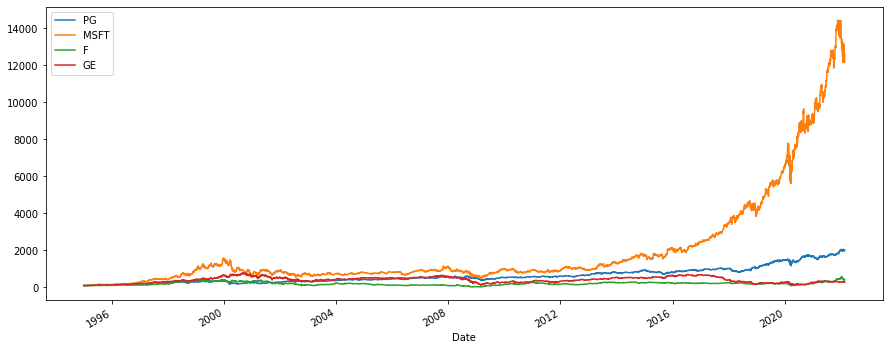

In [ ]:
# Visualize the normalized data (want to compare the 4 stocks starting at the same point 0 vs various different points)
fin_plot = (fin_data / fin_data.iloc[0]) * 100
fin_plot.plot(figsize = (15,6));

In [ ]:
# Extract the data for 1995-01-03
# `.loc[]` uses string sourcing
fin_data.loc['1995-01-03']

PG       7.971119
MSFT     2.369954
F        4.335945
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

In [ ]:
# Extract data using `iloc` for the first row data in the time series dataframe
# `iloc.[]` uses index sourcing
fin_data.iloc[0]

PG       7.971119
MSFT     2.369954
F        4.335945
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [ ]:
# Determine the returns of the financial dataframe
returns = (fin_data / fin_data.shift(1)) -1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [ ]:
# Determine the mean annual returns (250 trading days in a year)
annual_returns = returns.mean() * 250
annual_returns

PG      0.134731
MSFT    0.224610
F       0.132398
GE      0.089284
dtype: float64

In [ ]:
# Determine the annual return of the investment portfolio
annual_port_1 = np.dot(annual_returns, weights)
annual_port_1

0.1452557061825802

In [ ]:
# View as a percentage
print(str(round(annual_port_1, 5) * 100) + ' %')

14.526 %


What if the individuals stocks in the portfolio had different weights?

In [ ]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.15])
weights_2

array([0.4 , 0.4 , 0.15, 0.15])

In [ ]:
# Determine the annual return of the investment portfolio with different weights
# and compare with the first portfolio 
annual_port_2 = np.dot(annual_returns, weights_2)

print('Portfolio 1: ' + str(round(annual_port_1, 5)*100) + ' %')
print('Portfolio 2: ' + str(round(annual_port_2, 5)*100) + ' %')

Portfolio 1: 14.526 %
Portfolio 2: 17.699 %


## Calculating the Return of Indices

In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [ ]:
# Retrieve historical index data from Yahoo Finance for 
# S&P500 (^GSPC), NASDAQ(^IXIC), German DAX(^GDAXI), and HongKong Hang Seng (^HSI)
indexes = ['^GSPC', '^IXIC', '^GDAXI', '^HSI']   
index_data = pd.DataFrame()

for i in indexes:
  index_data[i] = web.DataReader(i, data_source = 'yahoo', start = '1997-01-01')['Adj Close']

In [ ]:
# Review first 5 rows of stock index data
index_data.head()

,^GSPC,^IXIC,^GDAXI,^HSI
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,13203.400391
1997-01-03,748.030029,1310.680054,2863.260010,13222.799805
1997-01-06,747.650024,1316.400024,2890.199951,13443.900391
1997-01-07,753.229980,1327.729980,2876.340088,13420.200195
1997-01-08,748.409973,1320.349976,2904.080078,13454.900391


In [ ]:
# Review last 5 rows of stock index data
index_data.tail()

,^GSPC,^IXIC,^GDAXI,^HSI
Date,,,,
2022-02-14,4401.669922,13790.919922,15113.969727,24556.570312
2022-02-15,4471.069824,14139.759766,15412.709961,24355.710938
2022-02-16,4475.009766,14124.089844,15396.070312,24718.900391
2022-02-17,4380.259766,13716.719727,15267.629883,24792.769531
2022-02-18,4348.870117,13548.070312,15042.509766,24327.710938


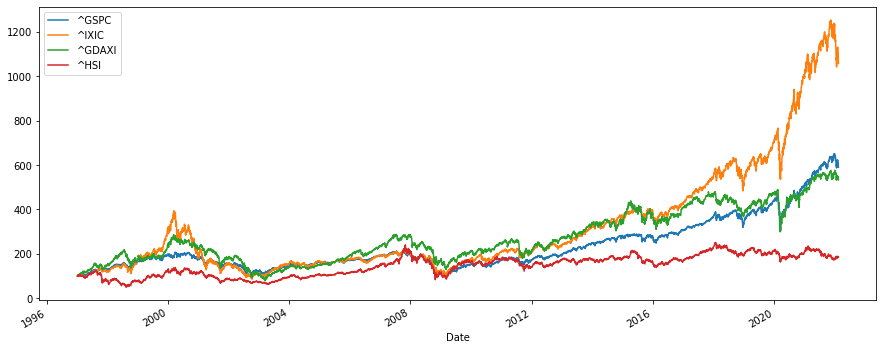

In [ ]:
# Normalize the index data
norm_index_data = (index_data / index_data.iloc[0]) * 100

# Visualize the normalized index data
norm_index_data.plot(figsize=(15,6));

In [ ]:
# Evaluate the simple rate of return of each index
index_returns = (index_data / index_data.shift(1)) - 1

# Return the last 5 rows of the simple rate of returns
index_returns.tail()

,^GSPC,^IXIC,^GDAXI,^HSI
Date,,,,
2022-02-14,-0.003841,-0.000017,-0.020172,-0.014056
2022-02-15,0.015767,0.025295,0.019766,-0.008179
2022-02-16,0.000881,-0.001108,-0.001080,0.014912
2022-02-17,-0.021173,-0.028842,-0.008342,0.002988
2022-02-18,-0.007166,-0.012295,-0.014745,-0.018758


In [ ]:
# Evaluate the annaual index returs for each index
annual_index_returns = index_returns.mean() * 250    # 250 trading days in a year
annual_index_returns

^GSPC     0.089146
^IXIC     0.124438
^GDAXI    0.078535
^HSI      0.038168
dtype: float64

In [ ]:
# Compare the P&G to the S&P500 and DowJones Index

indexes2 = ['PG', '^GSPC', '^DJI']

index_data_2 = pd.DataFrame()

for i2 in indexes2:
  index_data_2[i2] = web.DataReader(i2, data_source='yahoo', start='2007-1-1')['Adj Close']

In [ ]:
# Review the last 5 rows of the index_data_2
index_data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2022-02-14,156.740005,4401.669922,34566.171875
2022-02-15,156.820007,4471.069824,34988.839844
2022-02-16,158.009995,4475.009766,34934.269531
2022-02-17,159.820007,4380.259766,34312.031250
2022-02-18,159.899994,4348.870117,34079.179688


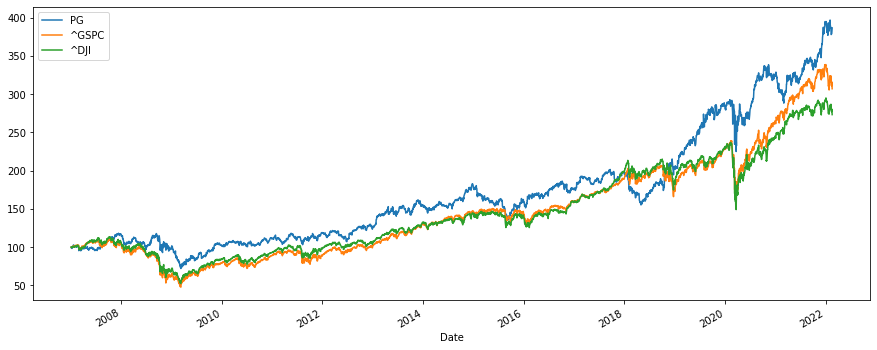

In [ ]:
# Normalize the data
norm_index_data_2 = (index_data_2 / index_data_2.iloc[0]) * 100

# Visualize the normalized data
norm_index_data_2.plot(figsize=(15,6));

From the normalized data, it can be inferred that P&G has better in comparison to the S&P and DowJones.